In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

### __Качественные (категориальные) данные__ - описывают принадледжность объекта к определенной группе

__Номинальные данные__ - не могут быть упорядочены, их сравнение не имеет смыла

In [2]:
cars = pd.DataFrame({'model' : ['Renault', 'Hyundai', 'KIA', 'Toyota'],
              'stock' : [12, 36, 28, 32]})

cars

,model,stock
0,Renault,12
1,Hyundai,36
2,KIA,28
3,Toyota,32


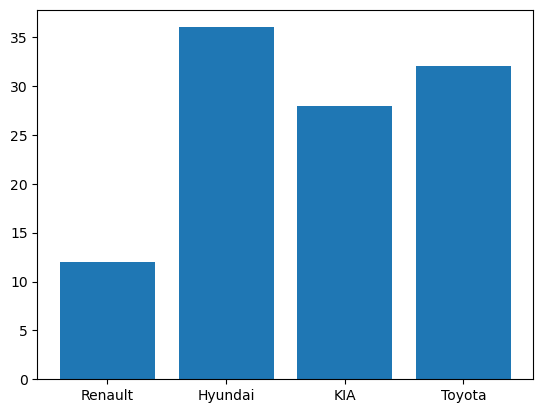

In [3]:
# выведем эти данные с помощью столбчатой диаграммы
plt.bar(cars.model, cars.stock);

__Порядковые данные__ - свойственна внутренняя иерархия, их можно проранжировать

In [4]:
satisfaction = pd.DataFrame({'sat_level': ['Good', 'Medium', 'Good', 'Medium', 'Bad', 'Medium', 'Good', 'Medium', 'Medium', 'Bad']})

satisfaction

,sat_level
0,Good
1,Medium
2,Good
3,Medium
4,Bad
5,Medium
6,Good
7,Medium
8,Medium
9,Bad


C:\Users\GIGABYTE\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


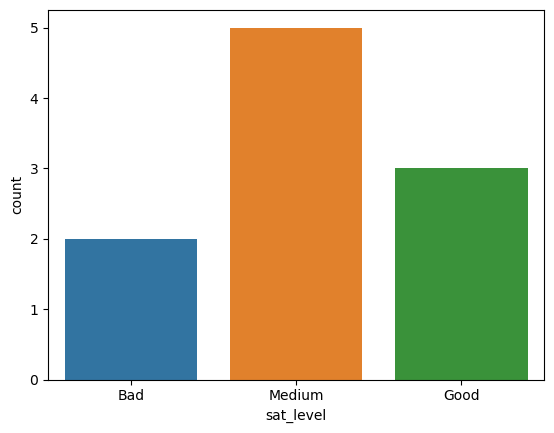

In [5]:
# переведм данные в тип categorical 
satisfaction.sat_level = pd.Categorical(satisfaction.sat_level,
                                        categories = ['Bad', 'Medium', 'Good'],
                                        ordered = True)
sns.countplot(x = 'sat_level', data = satisfaction);

### __Количественные данные__

__Дискретные данные__ - принимают строго определенные значения

__Неприрывные данные__ - всегда выражены неограниченным числом значений

__Распределение Пуассона__

In [18]:
# передадим функции np.random.poisson()
# матожидание (lam) и желаемое количество экспериметнов (size)
res = np.random.poisson(lam = 3, size = 1000)
# выведем первые 10 значений
res[:10]

array([3, 4, 3, 3, 3, 5, 4, 3, 3, 5])

In [19]:
# посмотрим сколько раз могло наступить событие и как часто оно встречалось
unique, counts = np.unique(res, return_counts = True)
unique, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13]),
 array([ 59, 166, 222, 216, 193,  74,  37,  21,   8,   2,   1,   1],
       dtype=int64))

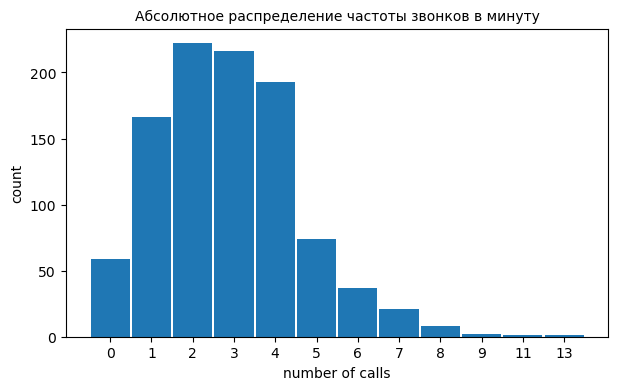

In [21]:
plt.figure(figsize = (7, 4))

# перед построением графика переведем значения unique в тип str 
plt.bar([str(x) for x in unique], counts, width = 0.95)
plt.title('Абсолютное распределение частоты звонков в минуту', fontsize = 10)
plt.xlabel('number of calls', fontsize = 10)
plt.ylabel('count', fontsize = 10);

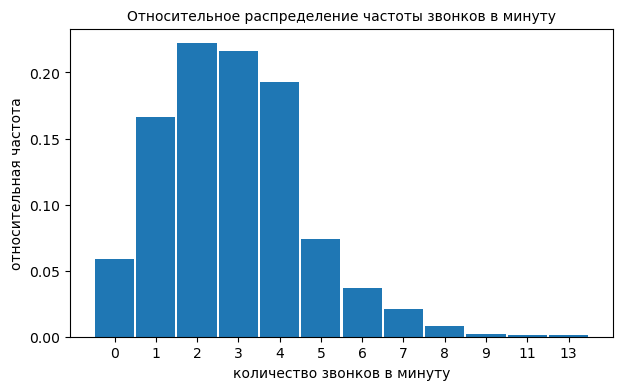

In [22]:
# рассмотрим как распределено количество событий относительно их общего числа
plt.figure(figsize = (7, 4))

# для этого разделим количество звонков в каждом из столбцов на общее число звонков
plt.bar([str(x) for x in unique], counts / len(res), width = 0.95)
plt.title('Относительное распределение частоты звонков в минуту', fontsize = 10)
plt.xlabel('количество звонков в минуту', fontsize = 10)
plt.ylabel('относительная частота', fontsize = 10);

In [23]:
# какова вероятность получить более шести звонков в минуту
# разделим число наблюдений, в которых было более шести звонков, на их общее количество
np.round(len(res[res > 6])/len(res), 3)

0.033

In [24]:
# какова вероятность получить от двух до шести звонков в минуту
np.round(len(res[res <6])/len(res) - len(res[res < 2])/len(res), 3)

0.705